## Search publications inside a project

Once your project is configured, it will start retrieving a lot of publications matching the query you have defined. We will see here how you can get some publications and filter the results.

In [1]:
from radarly import RadarlyApi
from radarly.project import Project

RadarlyApi.init()

project = Project.find(pid=2989)
project

<Project.pid=2989.label=Luxury [OFFICIAL DEMO]>

We will focus here on one dashboard, named *Watch Brands*. This dashboard is built with 3 queries.

In [2]:
watch_dashboard = project.dashboards[0]
watch_dashboard

<Dashboard.id=10389.label=1. Watch Brands>

In [3]:
watch_dashboard.focuses

[111423, 108279, 108277]

In [4]:
[focus for focus in project.focuses if focus.id in watch_dashboard.focuses]

[<Focus.id=108277.label=Jaeger-LeCoultre>,
 <Focus.id=108279.label=Rolex>,
 <Focus.id=111423.label=Omega>]

### Retrieve publications

You can get publications with two different ways : you can use the ``get_publications`` method of a ``Project`` instance or you can use the ``fetch`` class method  of the ``Publication`` object.

In [5]:
from radarly.publication import Publication

In [6]:
publications = Publication.fetch(project_id=2989, parameter={})
# is the same as
publications = project.get_publications(parameter={})
publications

[<Publication.uid='r3_prod_2989...30981_1190123'>,
 <Publication.uid='r3_prod_2989...5232_11023288'>,
 <Publication.uid='r3_prod_2989...7640564412416'>,
 <Publication.uid='r3_prod_2989...45_1187679661'>,
 <Publication.uid='r3_prod_2989...8928851989604'>,
 <Publication.uid='r3_prod_2989...506_519242336'>,
 <Publication.uid='r3_prod_2989...125_241290282'>,
 <Publication.uid='r3_prod_2989...68_8136722835'>,
 <Publication.uid='r3_prod_2989...7277425692673'>,
 <Publication.uid='r3_prod_2989...0105_19434221'>,
 <Publication.uid='r3_prod_2989...21_2215494233'>,
 <Publication.uid='r3_prod_2989...33_4270252006'>,
 <Publication.uid='r3_prod_2989...368_241290282'>,
 <Publication.uid='r3_prod_2989...04_2999512334'>,
 <Publication.uid='r3_prod_2989...7100035846151'>,
 <Publication.uid='r3_prod_2989...204_345652227'>,
 <Publication.uid='r3_prod_2989...6965151412224'>,
 <Publication.uid='r3_prod_2989...56116_5595119'>,
 <Publication.uid='r3_prod_2989...56_8102741151'>,
 <Publication.uid='r3_prod_2989

The result is a list of ``Publication`` object we will explore later.

Here, the payload sent to the API is empty and consequently some default parameters have been used. By specifying some keys in the ``search_parameter``, you can perform an advanced search. For example, to perform a search in one specific dashboard, you must specify the ids of the focuses contained in the dashboard. Please refer to the official documentation of the API to check all parameters you can use in the payload.

In [7]:
payload = {
    "start": 0, # start and limit are keys in order to configure pagination
    "limit": 30,
    "tones": ["positive", "neutral"], # get only publications which have a positive or neutral tone
    "platforms": ["instagram", "twitter", "facebook"],#  restrict the platform source of publications
    "from": "2018-03-01T00:00:00",
    "to": "2018-04-30T00:00:00",
    "focuses": [{'id': 108279, 'include': True},
      {'id': 111423, 'include': True},
      {'id': 108281, 'include': True},
      {'id': 108277, 'include': True},
      {'id': 108276, 'include': True}] # IDs of the focuses building the 'Watch Brands' dashboard
}
payload

{'focuses': [{'id': 108279, 'include': True},
  {'id': 111423, 'include': True},
  {'id': 108281, 'include': True},
  {'id': 108277, 'include': True},
  {'id': 108276, 'include': True}],
 'from': '2018-03-01T00:00:00',
 'limit': 30,
 'platforms': ['instagram', 'twitter', 'facebook'],
 'start': 0,
 'to': '2018-04-30T00:00:00',
 'tones': ['positive', 'neutral']}

In [8]:
publications = project.get_publications(payload)
publications

[<Publication.uid='r3_prod_2989...068_228007222'>,
 <Publication.uid='r3_prod_2989...57_7301970441'>,
 <Publication.uid='r3_prod_2989...2380583276545'>,
 <Publication.uid='r3_prod_2989...39_2288071081'>,
 <Publication.uid='r3_prod_2989...50_3449731600'>,
 <Publication.uid='r3_prod_2989...2011312472064'>,
 <Publication.uid='r3_prod_2989...60_5498963310'>,
 <Publication.uid='r3_prod_2989...701_244395624'>,
 <Publication.uid='r3_prod_2989...22_1526756917'>,
 <Publication.uid='r3_prod_2989...1824607215616'>,
 <Publication.uid='r3_prod_2989...092_341551699'>,
 <Publication.uid='r3_prod_2989...1638954848256'>,
 <Publication.uid='r3_prod_2989...1548508819456'>,
 <Publication.uid='r3_prod_2989...795_371045183'>,
 <Publication.uid='r3_prod_2989...33_5498963310'>,
 <Publication.uid='r3_prod_2989...84_1449194540'>,
 <Publication.uid='r3_prod_2989...12_6655989313'>,
 <Publication.uid='r3_prod_2989...0815780761600'>,
 <Publication.uid='r3_prod_2989...03_7563501789'>,
 <Publication.uid='r3_prod_2989

In order to build the payload in a easier way, you can use the ``SearchPublicationParameter`` defined in ``radarly.parameters``. This object has several methods in order to build and check the payload structure, and then can be passed in the ``search_parameter`` argument.

In [9]:
from datetime import datetime
from radarly.parameters import SearchPublicationParameter as Payload
from radarly.constants import TONE, PLATFORM

param = Payload() \
    .platforms(PLATFORM.FACEBOOK, PLATFORM.INSTAGRAM, PLATFORM.TWITTER) \
    .pagination(start=0, limit= 30) \
    .tones(TONE.POSITIVE, TONE.NEUTRAL) \
    .flag(retweet=False) \
    .publication_date(datetime(2018, 1, 1), datetime(2018, 4, 30)) \
    .focuses(include=watch_dashboard.focuses)
param

{'flag': {'favorite': None, 'rt': False, 'trash': None},
 'focuses': [{'id': 111423, 'include': True},
  {'id': 108279, 'include': True},
  {'id': 108277, 'include': True}],
 'from': '2018-01-01T00:00:00',
 'limit': 30,
 'platforms': ['facebook', 'instagram', 'twitter'],
 'start': 0,
 'to': '2018-04-30T00:00:00',
 'tones': ['positive', 'neutral']}

In [10]:
publications = project.get_publications(param)
publications

[<Publication.uid='r3_prod_2989...068_228007222'>,
 <Publication.uid='r3_prod_2989...57_7301970441'>,
 <Publication.uid='r3_prod_2989...2380583276545'>,
 <Publication.uid='r3_prod_2989...39_2288071081'>,
 <Publication.uid='r3_prod_2989...50_3449731600'>,
 <Publication.uid='r3_prod_2989...2011312472064'>,
 <Publication.uid='r3_prod_2989...60_5498963310'>,
 <Publication.uid='r3_prod_2989...701_244395624'>,
 <Publication.uid='r3_prod_2989...22_1526756917'>,
 <Publication.uid='r3_prod_2989...1824607215616'>,
 <Publication.uid='r3_prod_2989...092_341551699'>,
 <Publication.uid='r3_prod_2989...1638954848256'>,
 <Publication.uid='r3_prod_2989...795_371045183'>,
 <Publication.uid='r3_prod_2989...33_5498963310'>,
 <Publication.uid='r3_prod_2989...84_1449194540'>,
 <Publication.uid='r3_prod_2989...12_6655989313'>,
 <Publication.uid='r3_prod_2989...0815780761600'>,
 <Publication.uid='r3_prod_2989...03_7563501789'>,
 <Publication.uid='r3_prod_2989...0390_46524479'>,
 <Publication.uid='r3_prod_2989

Here, we have used the ``start`` and ``limit`` parameter to have some pagination effect in the result. To have the next range of publications, you can use the ``next_page`` method of ``SearchPublicationParameter``. 

In [11]:
publications = project.get_publications(param.next_page())
publications

[<Publication.uid='r3_prod_2989...44_5498963310'>,
 <Publication.uid='r3_prod_2989...26_7411957923'>,
 <Publication.uid='r3_prod_2989...53_5938307156'>,
 <Publication.uid='r3_prod_2989...8704573632512'>,
 <Publication.uid='r3_prod_2989...97_6678759480'>,
 <Publication.uid='r3_prod_2989...4940_46524479'>,
 <Publication.uid='r3_prod_2989...76_2948040594'>,
 <Publication.uid='r3_prod_2989...7492788723712'>,
 <Publication.uid='r3_prod_2989...7442503180288'>,
 <Publication.uid='r3_prod_2989...44_3989006961'>,
 <Publication.uid='r3_prod_2989...205_244395624'>,
 <Publication.uid='r3_prod_2989...47_5498963310'>,
 <Publication.uid='r3_prod_2989...55_3989006961'>,
 <Publication.uid='r3_prod_2989...76_3989006961'>,
 <Publication.uid='r3_prod_2989...97_6876003702'>,
 <Publication.uid='r3_prod_2989...93_7424024320'>,
 <Publication.uid='r3_prod_2989...578_482170296'>,
 <Publication.uid='r3_prod_2989...30_5498963310'>,
 <Publication.uid='r3_prod_2989...6223718203392'>,
 <Publication.uid='r3_prod_2989

To retrieve all publications, you can use the ``get_all_publications`` method of a project (or ``fetch_all`` of ``Publication``). This method will return a generator which yields a publication.

<div class="alert alert-warning">
The number of publications can be very high and consequently, a great number of request will be performed.
<div>

In [12]:
all_publications = project.get_all_publications(param)
all_publications

<PublicationsGenerator.total=706954.total_page=23566>

In [13]:
next(all_publications)

<Publication.uid='r3_prod_2989...44_5498963310'>

### Explore a publication

All the methods seen previously return a list (or generator) of ``Publication``. The ``Publication`` object inherits from the ``SourceModel`` and stores qualitative information. Thus, the structure of ``Publication`` can be explored with ``draw_structure`` and the special ``__getitem__`` method.

In [14]:
publications = project.get_publications(param)
publication = publications[0]
publication

<Publication.uid='r3_prod_2989...44_5498963310'>

In [15]:
publication.draw_structure(max_depth=2)

Publication (Publication)
| category (None)
| date (datetime)
| engagement_score (int)
| focuses (list)
| geo (dict)
| | given (dict)
| | inferred (dict)
| highlights (None)
| id (str)
| impression (int)
| is_story (bool)
| keyword (list)
| lang (str)
| media (dict)
| | image (list[str])
| | meta (None)
| | video (list)
| origin (dict)
| | detailed (str)
| | platform (str)
| | source (str)
| permalink (str)
| pid (int)
| radar (dict)
| | created (datetime)
| | favorite (bool)
| | tag (None)
| | trash (bool)
| | updated (datetime)
| | user_updated (None)
| reach (int)
| score (dict)
| | comment (int)
| | impression (None)
| | like (int)
| | reach (None)
| | story (None)
| text (str)
| tone (str)
| type (str)
| uid (str)
| user (dict)
| | account_type (str)
| | birth_date (None)
| | business_id (None)
| | followers (int)
| | gender (str)
| | id (int)
| | id_str (str)
| | name (str)
| | profile_img (str)
| | screen_name (str)
| | verified (None)


We will not give the details for each attribute but only for the most useful: `user` stores some information about the author of the publication, `score` is a dictionary with some statistics about the publication (comment, like, share...), `permalink` is the address of the publication, `origin` stores information about the origin platform and `media` is a dictionary with the link to the content of the publication.

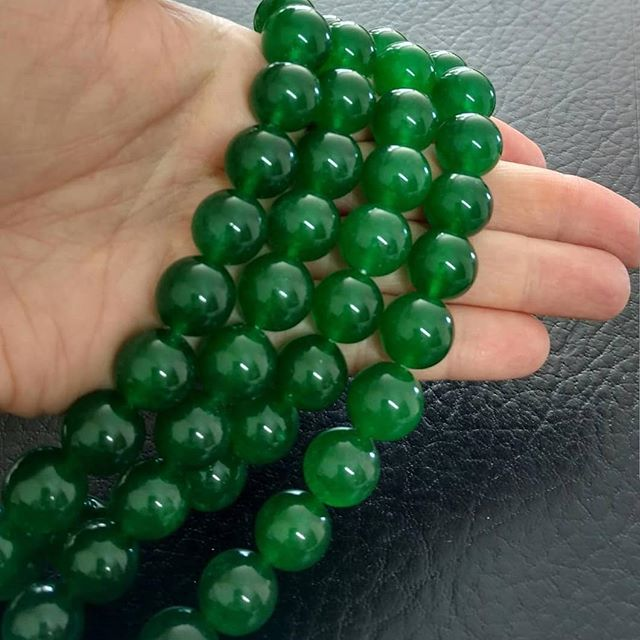

In [16]:
from IPython.display import Image
Image(publication.media['image'][0])

In [17]:
print(publication.text)

Imperial jade, when only the happiest green will do.

#millionaire #millionairelifestyle #millionairelife #billionaire #firstclass #bestofthebest #luxurylifestyle #richlife #richkidsofinstagram #richkids #richgang #topyacht #yacht #yachts #monaco #dubai #dubailife #wealth #wealthy #milliardaire #royal #royals #royallife #royalfamily #prince #princes #princess #ferrari #lamborghini #rolex


Thanks to the ``download`` method of ``Publication``, you can download the images or videos related to a publication. The ``download`` will try to download all media contents to obtain a local version of the data.

In [18]:
publication.media

{'image': ['https://scontent.cdninstagram.com/vp/426da26c4e4dc1e7f50e7216ba3212fa/5B7AB53C/t51.2885-15/s640x640/sh0.08/e35/31097070_1887599584598064_5816790366363320320_n.jpg'],
 'meta': None,
 'video': []}

In [19]:
publication.download(output_dir=None)

{'image': ['/Users/alexandre/Documents/Linkfluence/packages/radarly-py/docs/python/quickstart/31097070_1887599584598064_5816790366363320320_n.jpg'],
 'video': []}

Several methods have been implemented to get more information from the API about a publication. You can for example get all metadata information with ``get_metadata`` method.

In [20]:
publication = Publication.fetch(2, {'query':'uid:r3_prod_2-600249433620525056'})[0]
metadata = publication.get_metadata()
metadata

<Metadata.did=r3_prod_2-600249433620525056>

In [21]:
metadata.draw_structure()

Metadata (Metadata)
| did (str)
| trends (list[dict])
| | date (datetime)
| | scores (dict)
| | | favourite (int)
| | | rt (int)


You can also retrieve the raw content of a publication (available for forum or blog publications).

In [22]:
publication = project.get_publications({'platforms': ['forum']})[0]
raw_content = publication.get_raw()
raw_content

{'text': '<p><br/>Продано<br/></p>',
 'title': 'Rolex Datejust II 41mm White Gold & Steel & Diamonds'}

### Update a publication

You can update some fields of a publication. For example, you can update the tone, language and country of origin of a post or set some custom fields you have previously defined. To update a post with the client, you can use the ``Publication``'s method ``set_tags``. This method takes, as arguments, the new field you want to set on the post.

<div class="alert alert-warning">
In order to use this method, you must have write permission on your project.
</div>

Example: Lets's say that you want to update the first five publications published the 1st of July and set a keyword to all posts, update the country of origin and set a custom field. First, you have to retrieve these publications.

In [23]:
from radarly.constants import BY, ORDER

start_date = datetime(2018, 7, 1)
end_date = datetime(2018, 7, 1, 23, 59, 59)
param = Payload() \
    .publication_date(start_date, end_date) \
    .focuses(include=watch_dashboard.focuses) \
    .pagination(start=0, limit=5) \
    .sort_by(BY.DATE) \
    .sort_order(ORDER.DESCENDANT)
publications = project.get_publications(param)
publications

[<Publication.uid='r3_prod_2989...7960335324701'>,
 <Publication.uid='r3_prod_2989...33_5988463525'>,
 <Publication.uid='r3_prod_2989...2807958163456'>,
 <Publication.uid='r3_prod_2989...5015662940452'>,
 <Publication.uid='r3_prod_2989...2657852420101'>]

Once you have your publications, you can set the new fields by calling the ``set_tags`` method.

In [24]:
# for publication in publications:
#    publication.set_tags(tone='neutral',
#                         keywords=['UPDATE_WITH_CLIENT'],
#                         custom_tags={'Reviews': ['Review']})

This method returns nothing if the update was successful otherwise it will raise a ``PublicationUpdateFailed`` defined in ``radarly.exceptions``. It will update the publication in Radarly as well as the ``Publication`` object.

You can check the inline documentation to get additional information about this method.

In [25]:
help(publication.set_tags)

Help on method set_tags in module radarly.publication:

set_tags(*args, **kwargs) method of radarly.publication.Publication instance
    Update some information about a publication in Radarly. This
    method is based on the ``set_publication_tags`` function defined in
    the same module.
    
    .. warning:: Unlike the ``set_publication_tags``, this function returns
        None in case of success (the ``set_publication_tags`` returns a
        ``Publication`` object).
    
    Args:
        tone (str): tone of the publication. Can be `positive`,
            `negative`, `mixed` or `neutral`.
        language (str): alpha-2, alpha-3, or name of the language
        country (str): alpha-2, alpha-3 or name of the country
        keywords (list[str]): list of keywords for the publication
        custom_tags (dict[str -> list[str]]): value of the custom tags
            to set. The template for this argument is::
    
            {<label of the custom_tag>: [<label of the subtag>]}.
    

Given that the API only requires the ``project_id`` , ``uid`` and ``platform`` as parameters to update a publication, it can be tedious to have to recover the full ``Publication`` object just to update your publications. Thus the fonction ``set_publication_tags`` was defined; this function which takes only ``uid`` and ``platform`` as parameter (and the field you want to update). It works in the same way as the ``set_tags`` methods but it returns the updated ``Publication`` object instead of nothing in case of success.

In [26]:
# for publication in publications:
#     set_publication_tags(project_id=project.id,
#                          uid=publication.uid,
#                          platform=publication.origin['platform'],
#                          tone='neutral',
#                          custom_tags={'Reviews': ['Review']})